In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
import random

In [2]:
# Load MNIST dataset (28x28 grayscale images of digits)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Normalize pixel values to [0,1] range for easier network training
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Add channel dimension for grayscale (batch_size, 28, 28, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [5]:
# Function to plot images with labels
def plot_digit(image, digit, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

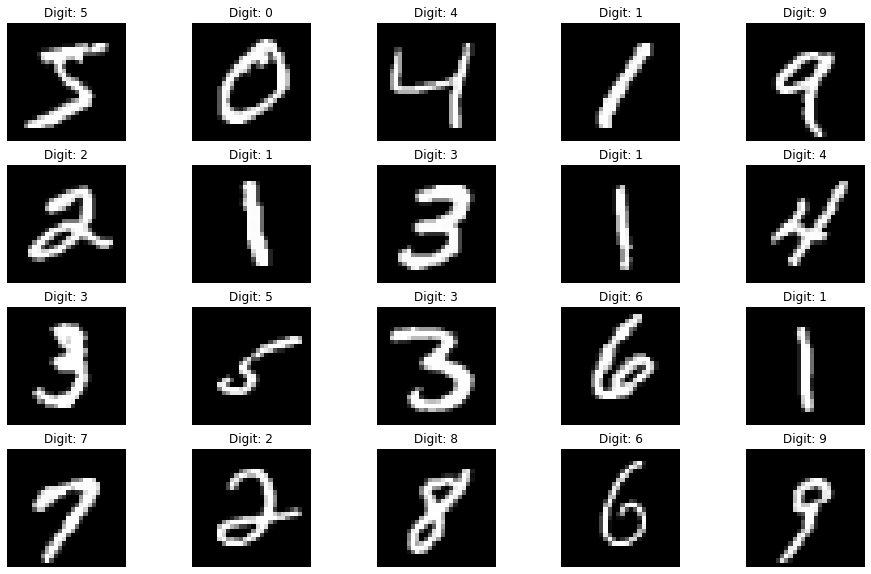

In [6]:
# Plot first 20 training images
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], i)
plt.show()

In [7]:
# Build CNN model using Keras Sequential API
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

In [8]:
# Compile model with SGD optimizer and sparse categorical crossentropy loss
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',  # use sparse since labels are integers
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [9]:
# Train model for 10 epochs with batch size 32
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2392 - accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0787 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0497 - accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0262 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0110 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0072 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [10]:
# Evaluate model accuracy on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.0456
Test accuracy: 0.9861


1/1 [==============================] - 0s 22ms/step


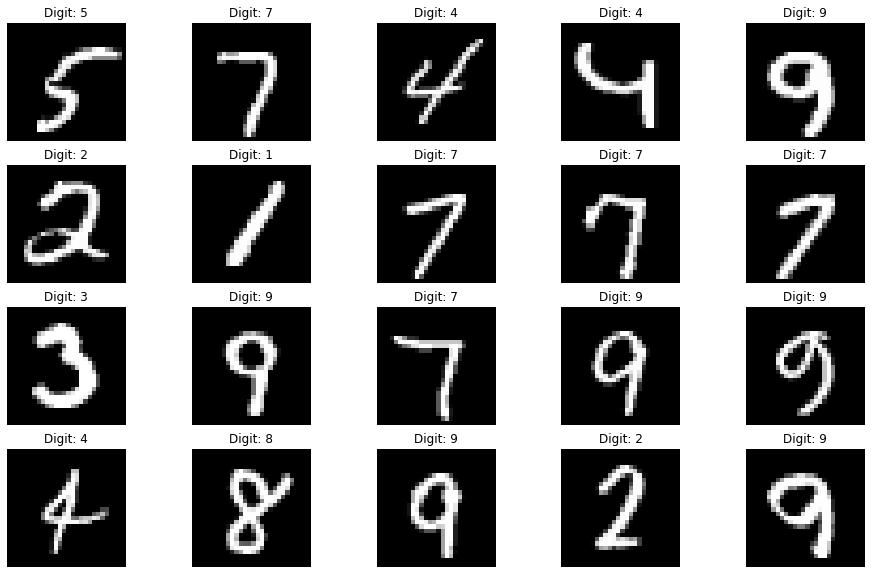

In [11]:
# Predict 20 random test images and plot predictions
plt.figure(figsize=(16, 10))
for i in range(20):
    idx = random.randint(0, len(X_test)-1)
    image = X_test[idx]
    pred = np.argmax(model.predict(image[np.newaxis, ...])[0])
    plot_digit(image, pred, i)
plt.show()

In [12]:
# Calculate final accuracy over the entire test set using sklearn (optional)
predictions = np.argmax(model.predict(X_test), axis=-1)
print(f"Sklearn accuracy score: {accuracy_score(y_test, predictions):.4f}")

313/313 [==============================] - 2s 6ms/step
Sklearn accuracy score: 0.9861
